In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정


In [3]:
from pathlib import Path
IMAGE_PATH = Path() / "images"/ "ann"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Perceptron, SGDClassifier

In [5]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

In [6]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

Perceptron(random_state=42)

In [7]:
X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new)

In [8]:
y_pred

array([ True, False])

In [9]:
sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, 
                        random_state=42)
sgd_clf.fit(X, y)
assert(sgd_clf.coef_ == per_clf.coef_) .all()

In [10]:
assert(sgd_clf.intercept_ == per_clf.intercept_) .all()

In [11]:
from matplotlib.colors import ListedColormap

In [15]:
a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]

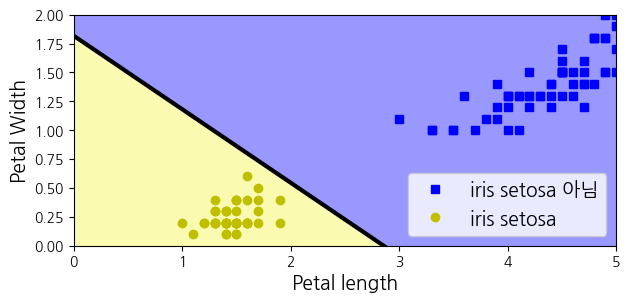

In [16]:
x0 , x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
     np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(["#9898ff", "#fafab0"])

plt.figure(figsize=(7,3))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="iris setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a* axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

In [17]:
from scipy.special import exprel as sigmoid

def relu(z):
    return np.maximum(0, z)
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

In [18]:
max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

In [26]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
hosung=  datasets.fetch_california_housing()

In [28]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    hosung.data, hosung.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [29]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50],random_state=42)
pipeline= make_pipeline(StandardScaler(), mlp_reg)

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [31]:
y_pred = pipeline.predict(X_valid)

In [33]:
rmse = root_mean_squared_error(y_valid, y_pred)

In [34]:
rmse

0.5053326657968448

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
iris = datasets.load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, random_state=42 ,test_size=0.1
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42,test_size=0.1
)

In [37]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)

In [38]:
pipeline = make_pipeline(StandardScaler(), mlp_clf)

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=[5], max_iter=10000,
                               random_state=42))])

In [40]:
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

fashion_mnist = fashion_mnist.load_data()

In [42]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [43]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [44]:
X_train.shape

(55000, 28, 28)

In [45]:
X_train.dtype

dtype('uint8')

In [46]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test /255

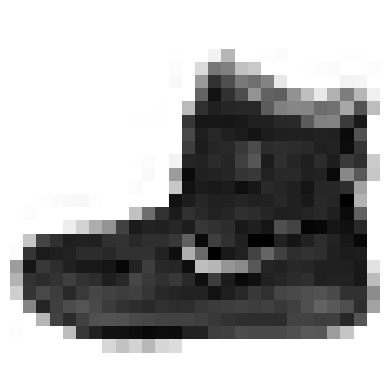

In [47]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [48]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]